<a href="https://colab.research.google.com/github/ysokr1001/python/blob/main/0525_(%EC%BC%80%EB%9D%BC%EC%8A%A4)%EB%AA%A8%EB%8D%B8%20%EC%97%85%EB%8D%B0%EC%9D%B4%ED%8A%B8%2C%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed= 0
np.random.seed(seed)
tf.random.set_seed(seed)

df_pre = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/wine.csv", header=None)
df = df_pre.sample(frac=1)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose = 1, 
                               save_best_only=True)

model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])


print("\n Accuracy:%.4f"%(model.evaluate(X,Y)[1]))

In [ ]:
#그래프로 확인하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint


import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed= 0
np.random.seed(seed)
tf.random.set_seed(seed)

df_pre = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/wine.csv", header=None)
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c='red', markersize=3)
plt.plot(x_len, y_acc, "o", c='blue', markersize=3)

plt.show()
# print("\n Accuracy:%.4f"%(model.evaluate(X,Y)[1]))


Epoch 00001: val_loss improved from inf to 0.29722, saving model to ./model/01-0.2972.hdf5

Epoch 00002: val_loss improved from 0.29722 to 0.25425, saving model to ./model/02-0.2543.hdf5

Epoch 00003: val_loss improved from 0.25425 to 0.23356, saving model to ./model/03-0.2336.hdf5

Epoch 00004: val_loss improved from 0.23356 to 0.21444, saving model to ./model/04-0.2144.hdf5

Epoch 00005: val_loss improved from 0.21444 to 0.19984, saving model to ./model/05-0.1998.hdf5

Epoch 00006: val_loss improved from 0.19984 to 0.19539, saving model to ./model/06-0.1954.hdf5

Epoch 00007: val_loss improved from 0.19539 to 0.19016, saving model to ./model/07-0.1902.hdf5

Epoch 00008: val_loss did not improve from 0.19016

Epoch 00009: val_loss improved from 0.19016 to 0.18586, saving model to ./model/09-0.1859.hdf5

Epoch 00010: val_loss improved from 0.18586 to 0.18406, saving model to ./model/10-0.1841.hdf5

Epoch 00011: val_loss did not improve from 0.18406

Epoch 00012: val_loss improved from

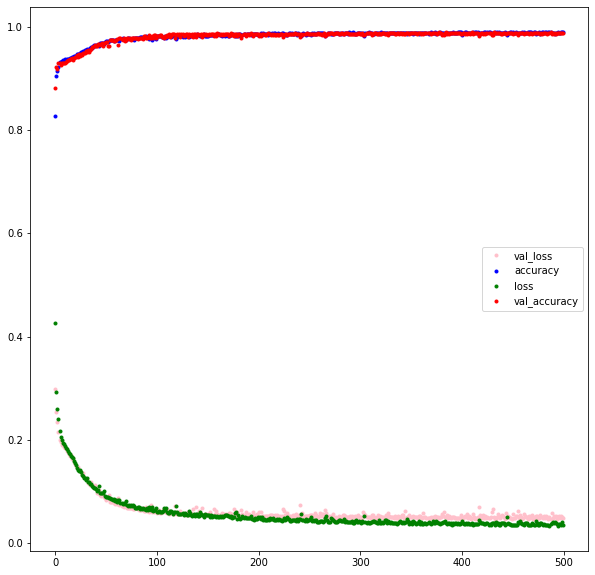

In [19]:
#와인 val_loss, loss, acc, vacc 모두 그래프로 구현하기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed= 0
np.random.seed(seed)
tf.random.set_seed(seed)

df_pre = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/wine.csv", header=None)
df = df_pre.sample(frac=1)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose = 1, 
                               save_best_only=True)

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.2, epochs=500, batch_size=200, verbose=0, callbacks=[checkpointer])

y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
y_loss = history.history['loss']
y_vacc = history.history['val_accuracy']


x_len = np.arange(len(y_acc))
plt.figure(figsize=(10, 10))
plt.plot(x_len, y_vloss, "o", c='pink', markersize=3, label='val_loss')
plt.plot(x_len, y_acc, "o", c='blue', markersize=3, label= 'accuracy')
plt.plot(x_len, y_loss, "o", c='green', markersize=3, label='loss')
plt.plot(x_len, y_vacc, "o", c='red', markersize=3, label='val_accuracy')
plt.legend()


plt.show()

In [ ]:
#학습 자동 중단-1060에서 멈춤

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed= 0
np.random.seed(seed)
tf.random.set_seed(seed)

df_pre = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/wine.csv", header=None)
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=100)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose = 1, 
                               save_best_only=True)

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500, callbacks=[early_stopping_callback, checkpointer])

# y_vloss = history.history['val_loss']
# y_acc = history.history['accuracy']
# y_loss = history.history['loss']
# y_vacc = history.history['val_accuracy']


# x_len = np.arange(len(y_acc))
# plt.figure(figsize=(10, 10))
# plt.plot(x_len, y_vloss, "o", c='pink', markersize=3, label='val_loss')
# plt.plot(x_len, y_acc, "o", c='blue', markersize=3, label= 'accuracy')
# plt.plot(x_len, y_loss, "o", c='green', markersize=3, label='loss')
# plt.plot(x_len, y_vacc, "o", c='red', markersize=3, label='val_accuracy')
# plt.legend()


# plt.show()

print("\n Accuracy: %.4f"%(model.evaluate(X,Y)[1]))

Epoch 1/100
2/2 [==============================] - 0s 160ms/step - loss: 3.7648 - accuracy: 0.2905 - val_loss: 3.7530 - val_accuracy: 0.1250
Epoch 2/100
2/2 [==============================] - 0s 36ms/step - loss: 3.9459 - accuracy: 0.2238 - val_loss: 3.6743 - val_accuracy: 0.1250
Epoch 3/100
2/2 [==============================] - 0s 37ms/step - loss: 3.6080 - accuracy: 0.2905 - val_loss: 3.5973 - val_accuracy: 0.1250
Epoch 4/100
2/2 [==============================] - 0s 36ms/step - loss: 3.7223 - accuracy: 0.2571 - val_loss: 3.5129 - val_accuracy: 0.1250
Epoch 5/100
2/2 [==============================] - 0s 35ms/step - loss: 3.5813 - accuracy: 0.2905 - val_loss: 3.4301 - val_accuracy: 0.1250
Epoch 6/100
2/2 [==============================] - 0s 38ms/step - loss: 3.6229 - accuracy: 0.2238 - val_loss: 3.3434 - val_accuracy: 0.1250
Epoch 7/100
2/2 [==============================] - 0s 34ms/step - loss: 3.2735 - accuracy: 0.2905 - val_loss: 3.2563 - val_accuracy: 0.1250
Epoch 8/100
2/2 [==

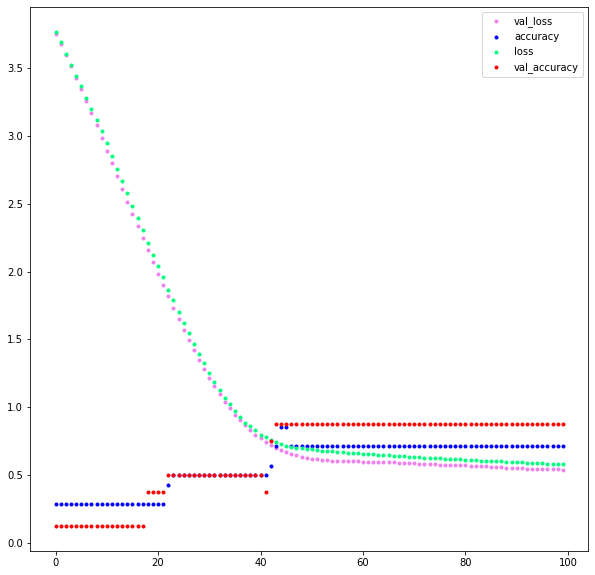

1/1 [==============================] - 0s 16ms/step - loss: 0.5645 - accuracy: 0.7727

 Accuracy: 0.7727


In [29]:
#아이리스로 해보기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder

import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed= 0
np.random.seed(seed)
tf.random.set_seed(seed)

df_pre = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/iris.csv", names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
# df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:, 0:4].astype(float)
Y_obj = dataset[:, 4]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax')) 

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=100)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose = 1, 
                               save_best_only=True)

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, Y_encoded, validation_split=0.33, epochs=100, batch_size=10)

y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
y_loss = history.history['loss']
y_vacc = history.history['val_accuracy']


x_len = np.arange(len(y_acc))
plt.figure(figsize=(10, 10))
plt.plot(x_len, y_vloss, "o", c='violet', markersize=3, label='val_loss')
plt.plot(x_len, y_acc, "o", c='blue', markersize=3, label= 'accuracy')
plt.plot(x_len, y_loss, "o", c='springgreen', markersize=3, label='loss')
plt.plot(x_len, y_vacc, "o", c='red', markersize=3, label='val_accuracy')
plt.legend()


plt.show()

print("\n Accuracy: %.4f"%(model.evaluate(X,Y_encoded)[1]))

Epoch 1/3500
4/4 [==============================] - 0s 55ms/step - loss: 1.9540 - accuracy: 0.3292 - val_loss: 1.7890 - val_accuracy: 0.3800

Epoch 00001: val_loss improved from inf to 1.78900, saving model to ./model/01-1.7890.hdf5
Epoch 2/3500
4/4 [==============================] - 0s 13ms/step - loss: 1.7543 - accuracy: 0.3407 - val_loss: 1.6607 - val_accuracy: 0.3800

Epoch 00002: val_loss improved from 1.78900 to 1.66070, saving model to ./model/02-1.6607.hdf5
Epoch 3/3500
4/4 [==============================] - 0s 12ms/step - loss: 1.6765 - accuracy: 0.3115 - val_loss: 1.5433 - val_accuracy: 0.3800

Epoch 00003: val_loss improved from 1.66070 to 1.54332, saving model to ./model/03-1.5433.hdf5
Epoch 4/3500
4/4 [==============================] - 0s 13ms/step - loss: 1.5779 - accuracy: 0.3157 - val_loss: 1.4386 - val_accuracy: 0.3800

Epoch 00004: val_loss improved from 1.54332 to 1.43862, saving model to ./model/04-1.4386.hdf5
Epoch 5/3500
4/4 [==============================] - 0s 1

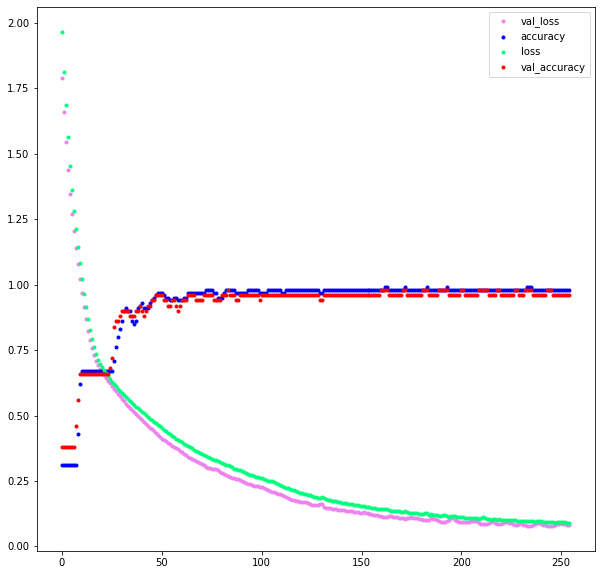

5/5 [==============================] - 0s 2ms/step - loss: 0.0871 - accuracy: 0.9733

 Accuracy: 0.9733


In [36]:
#아이리스로 해보기 - frac 설정을 하고 안하고의 차이가 큼. 없으면 그래프가 이상하게 그려짐

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder

import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed= 0
np.random.seed(seed)
tf.random.set_seed(seed)

df_pre = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/iris.csv", names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
df = df_pre.sample(frac=1)

dataset = df.values
X = dataset[:, 0:4].astype(float)
Y_obj = dataset[:, 4]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax')) 

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=10)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose = 1, 
                               save_best_only=True)

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, Y_encoded, validation_split=0.33, epochs=3500, batch_size=0, callbacks=[early_stopping_callback, checkpointer])

y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
y_loss = history.history['loss']
y_vacc = history.history['val_accuracy']


x_len = np.arange(len(y_acc))
plt.figure(figsize=(10, 10))
plt.plot(x_len, y_vloss, "o", c='violet', markersize=3, label='val_loss')
plt.plot(x_len, y_acc, "o", c='blue', markersize=3, label= 'accuracy')
plt.plot(x_len, y_loss, "o", c='springgreen', markersize=3, label='loss')
plt.plot(x_len, y_vacc, "o", c='red', markersize=3, label='val_accuracy')
plt.legend()


plt.show()

print("\n Accuracy: %.4f"%(model.evaluate(X,Y_encoded)[1]))

In [40]:

import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/housing.csv", delim_whitespace=True, header=None)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
        0     1     2   3      4      5   ...  8      9     10      11    12    13
0  0.00632  18.0  2.31   0  0.538  6.575  ...   1  296.0  15.3  396.90  4.98  24.0
1  0.02731   0.0  7.07   0  0.469  6.421  ...   2  242.0  17.8  396.90  9.14  21

In [55]:
#집값 예측 - 선형회귀 실행 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import tensorflow as tf

seed= 0
np.random.seed(seed)
tf.random.set_seed(seed)

df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/housing.csv", delim_whitespace=True, header=None)

dataset = df.values
X = dataset[:, 0:13]
Y = dataset[:, 13]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(30, input_dim=14, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1)) 

model.compile(loss = 'mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=200, batch_size=10)

Y_prediction = model.predict(X_test).flatten()
for i in range(10):
  label = Y_test[i]
  prediction = Y_prediction[i]
  print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

Epoch 1/200


ValueError: ignored